# Reactors in series with Flowsheet function:
Any number of chemical reactors can be consequtively connected in a `.Flowsheet()` module

In [12]:
from ipywidgets import interact, widgets
import matplotlib.pyplot as p
import numpy as np
from chemreact import models, tools, Flowsheet

First, create a set of chemical reactors. For this example, we will create 3 CSTRs with $V=5$ and $q=1$ in series:

In [2]:
V=5
r1= models.CSTR(V=V)
r2 = models.CSTR(V=V)
r3 = models.CSTR(V=V)

Now, create a new flowsheet under the name `f`. So far the flowsheet is empty.

In [3]:
f = Flowsheet()
f.run()

Any number and types of reactor can be added consequently in a flowsheet with `.connect(r1,r2,r3,...)` command.
To check which units are in the flowsheet, use `.units'

In [4]:
f.connect(r1,r2,r3)
print(f.units)

OrderedDict([(0, <chemreact.lib.models.CSTR object at 0x7f58e71c4cd0>), (1, <chemreact.lib.models.CSTR object at 0x7f58e71c4d10>), (2, <chemreact.lib.models.CSTR object at 0x7f59029ab090>)])


Inlet into flowsheet has to be set by adding new inlet into the first reactor `r1`. And now, the whole flowsheet can be simulated. For each added reactor, the output contains a plot with inlet and outlet for that particular reactor.

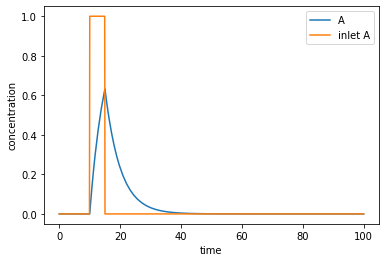

run time: 0.037s


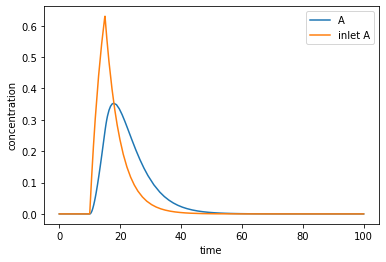

run time: 0.054s


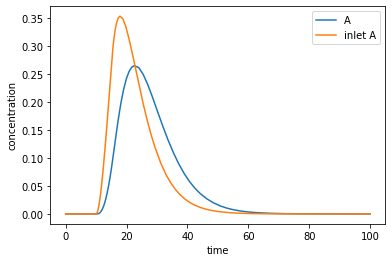

run time: 0.048s


In [5]:
r1.inlet(A=tools.rect(t0=10, t1=15, y0=0, y1=1))
f.run()

We can add a `.Chemistry()` module into any of the reactors. This would apply only to the reactor, but not the whole flowsheet. For example, lets add simple chemistry into middle reactor `r2` and run the whole flowsheet again.

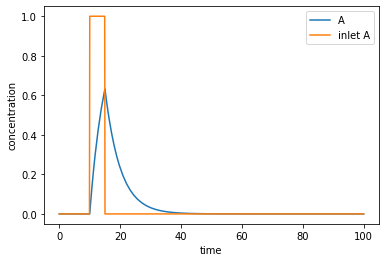

run time: 0.037s


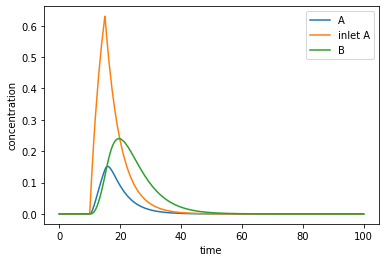

run time: 0.065s


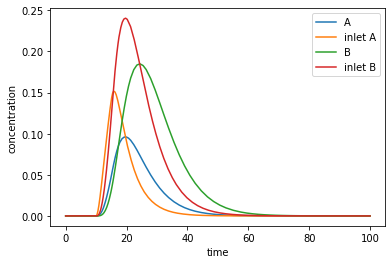

run time: 0.057s


In [6]:
c = models.Chemistry()
c.reaction('A=>B', k=0.5)
r2.chemistry = c
f.run()

PFRs can be combined with CSTRs, too. To show it, we create a new flowsheet and new set of reactors.

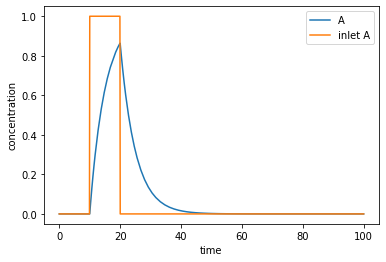

run time: 0.039s


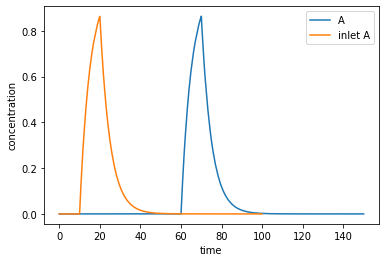

run time: 0.244s


In [7]:
r4 = models.CSTR(V=5)
r5 = models.PFR(V=50)
r4.inlet(A=tools.rect())
f2 = Flowsheet()
f2.connect(r4, r5)
f2.run()

Chemistry can be added to any of the reactors. Let's add different reactions in `r4` and `r5`.
Note, that `r5` will take long time to calclulate

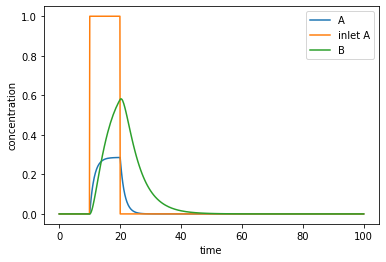

run time: 0.058s


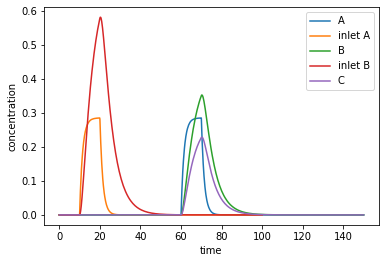

run time: 11.960s


In [8]:
c2 = models.Chemistry()
c2.reaction('A=>B', k=0.5)

c3 = models.Chemistry()
c3.reaction('B=>C', k=0.01)

r4.chemistry = c2
r5.chemistry = c3

f2.run()

### CSTRs in series
How does CSTR in series compares to single CSTR or PFR?

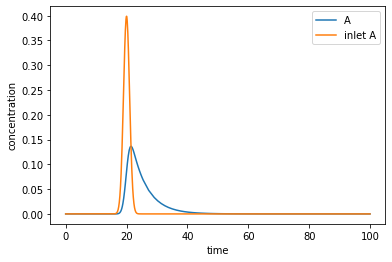

run time: 0.043s


In [9]:
V=5 # setting the volume
r1 = models.CSTR(V=V)
r1.inlet(A=tools.gaussian(y_tot=1,t1=20))
r1.run()

In [10]:
def series(N=5, V=V):
    f = Flowsheet()
    r0 = models.CSTR(V=V/N)
    r0.inlet(A=tools.gaussian(y_tot=1,t1=20))
    for n in range(N-1):
        r = models.CSTR(V=V/N)
        if n>0: 
            f.connect(f.units[n], r)
        else:
            f.connect(r0,r)
    f.run(plot=False)
    return f

(15, 50)

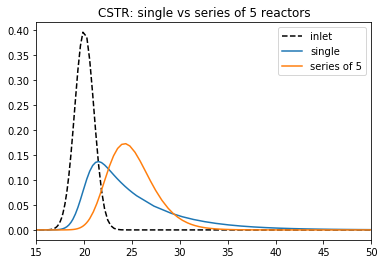

In [13]:
f = series(5)
in_t = r1.solution['t']
in_y = r1.initial_values['A'](in_t)
p.plot(in_t, in_y, 'k--', label = 'inlet')
p.plot(r1.solution['t'],r1.solution['A'], label='single')
_r=f.units[len(f.units)-1]
p.plot(_r.solution['t'],_r.solution['A'], label='series of 5')
p.legend()
p.title('CSTR: single vs series of 5 reactors')
p.xlim((15, 50))

#### Interactive version:

In [14]:
@interact
def f(N=(2,20,1)):
    f = series(N)
    in_t = r1.solution['t']
    in_y = r1.initial_values['A'](in_t)
    p.plot(in_t, in_y, 'k--', label = 'inlet')
    p.plot(r1.solution['t'],r1.solution['A'], label='single')
    _r=f.units[len(f.units)-1]
    p.plot(_r.solution['t'],_r.solution['A'], label='series')
    p.legend()
    p.title('CSTR: single vs series')
    p.xlim((15, 50))

interactive(children=(IntSlider(value=11, description='N', max=20, min=2), Output()), _dom_classes=('widget-in…

### Changing volume of CSTR:

In [15]:
r1.V=1
r1.run(False)
in_t = r1.solution['t']
in_y = r1.initial_values['A'](in_t)
sol1_t = r1.solution['t']
sol1_A = r1.solution['A']
@interact
def f(V=(0.1,10,0.01)):
    p.plot(in_t, in_y, 'k--', label = 'inlet')
    p.plot(sol1_t,sol1_A, label='V=1')
    r1.V=V
    r1.run(False)
    _r=r1
    p.plot(_r.solution['t'],_r.solution['A'], label=f'V={V}')
    p.legend()
    p.title('CSTR: changing volume')
    p.xlim((15, 50))

interactive(children=(FloatSlider(value=5.05, description='V', max=10.0, min=0.1, step=0.01), Output()), _dom_…

## Chemical reaction, component B is fixed inside the reacor (flow of B = 0)

In [18]:
r = models.CSTR()
c = models.Chemistry()
c.reaction('A+B=>C')
r.chemistry = c
r.inlet(A=1, B=1)
r.q = np.array([1,0,1])

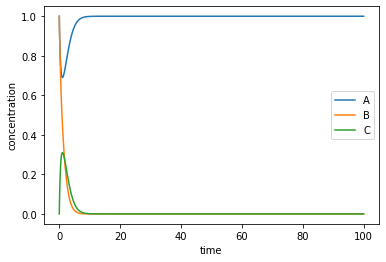

run time: 0.038s


In [19]:
r.run()

In [20]:
@interact
def f(k = (0.0001,1,0.1)):
    c.rate_constants[0]=k
    r.run()

interactive(children=(FloatSlider(value=0.4001, description='k', max=1.0, min=0.0001), Output()), _dom_classes…